In [6]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenlayer = 3, outputSize = 1 ):        
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenlayer
        #weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenLayer) # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W2 = np.random.randn(self.hiddenLayer, self.outputSize) # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias    
        self.activation = 'sigmoid'
        
    def feedforward(self, X):
        #forward propagation through our network
        # dot product of X (input) and set of weights
        # apply activation function (i.e. whatever function was passed in initialization)    
        self.z1 = np.dot(X, self.W1)
        if self.activation == 'sigmoid':
            self.a1 = self.sigmoid(self.z1)
        elif self.activation == 'tanh':
            self.a1 = self.tanh(self.z1)
        elif self.activation == 'relu':
            self.a1 = self.relu(self.z1)

        self.z2 = np.dot(self.a1, self.W2)
        y_pred = self.sigmoid(self.z2)
        #reshaping
        #y_pred = y_pred.reshape(-1,1)
        return y_pred # return your answer with as a final output of the network

    def sigmoid(self, s):
        # activation function
        return (1 / (1 + np.exp(-s))) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return s * (1 - s) # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        return np.tanh(s) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        return 1 - np.tanh(s) ** 2 # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        # activation function
        return np.maximum(0, s) # apply relu function on s and return it's value

    def relu_derivative(self, s):
        #derivative of relu
        s[s <= 0] = 0
        s[s > 0] = 1
        return s # apply derivative of relu on s and return it's value

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        # compute error in output which is loss compute cross entropy loss function
        # applying derivative of that applied activation function to the error
        # adjust set of weights
        #delta2 = (Y - y_pred) * self.sigmoid_derivative(y_pred)
        
        if self.activation == 'sigmoid':
            delta2 = (Y - y_pred) * self.sigmoid_derivative(y_pred)
            #delta2 = np.expand_dims(Y - y_pred, 1) * self.sigmoid_derivative(y_pred)
        elif self.activation == 'tanh':
            delta2 = (Y - y_pred) * self.tanh_derivative(y_pred)
            #delta2 = np.expand_dims(Y - y_pred, 1) * self.tanh_derivative(y_pred)
        elif self.activation == 'relu':
            delta2 = (Y - y_pred) * self.relu_derivative(y_pred)
            #delta2 = np.expand_dims(Y - y_pred, 1) * self.relu_derivative(y_pred)

        dW2 = np.dot(self.z2.T, delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)

        print(delta2.shape)
        print(self.W2.shape)

        delta1 = np.dot(delta2, self.W2.T)
        # Compute delta1 using chain rule and the appropriate derivative based on the activation

        if self.activation == 'sigmoid':
            delta1 = np.dot(delta2, self.W2.T) * self.sigmoid_derivative(self.a1)
        elif self.activation == 'tanh':
            delta1 = np.dot(delta2, self.W2.T) * self.tanh_derivative(self.z1)
        elif self.activation == 'relu':
            delta1 = np.dot(delta2, self.W2.T) * np.transpose(self.relu_derivative(self.z1))

        dW1 = np.dot(X.T, delta1) 
        #dW1 = dW1.sum(axis=1, keepdims=True).T # Added this line
        #dW1 = dW1.reshape(700, 1) # Added this
        db1 = np.sum(delta1, axis=0, keepdims=True) 

        # Update weights and biases
        self.W1 += lr * dW1
        self.W2 += lr * dW2

        #delta2 = delta2.reshape(-1,1)
        delta1 = np.dot(delta2, self.W2.T)


    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        epsilon = 1e-15
        Y_pred = np.clip(Y_pred, epsilon, 1 - epsilon)
        error = - (Y * np.log(Y_pred) + (1 - Y) * np.log(1 - Y_pred))
        return np.mean(error) #error

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = None, validationY = None):
        # feed forward trainX and trainY and recivce predicted value
        # backpropagation with trainX, trainY, predicted value and learning rate.
        # if validationX and validationY are not null than show validation accuracy and error of the model by printing values.
        # plot error of the model if plot_err is true
        train_loss = []
        valid_loss = []

        for epoch in range(epochs):
            # Forward pass
            y_pred = self.feedforward(trainX)

            # Compute and store the training loss
            loss = self.crossentropy(trainY, y_pred)
            train_loss.append(loss)

            # Backpropagation and weight update
            self.backwardpropagate(trainX, trainY, y_pred, learningRate)

            # Validation loss
            if validationX is not None and validationY is not None:
                y_valid_pred = self.feedforward(validationX)
                valid_loss.append(self.crossentropy(validationY, y_valid_pred))

        if plot_err:
            plt.plot(range(epochs), train_loss, label='Training Loss')
            if validationX is not None and validationY is not None:
                plt.plot(range(epochs), valid_loss, label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Cross-Entropy Loss')
            plt.legend()
            plt.show()

    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        y_pred = self.feedforward(testX)
        y_pred = np.round(y_pred)
        accuracy = np.mean(y_pred == testY)
        return accuracy # return accuracy    
        
    def saveModel(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        model_data = {
            'inputSize': self.inputSize,
            'outputSize': self.outputSize,
            'hiddenLayer': self.hiddenLayer,
            'activation': self.activation,
            'W1': self.W1,
            'W2': self.W2
        }
        np.save(name, model_data)
        
    def loadModel(self,name):
        # load your trained model, load exactly how you stored it.
        model_data = np.load(name, allow_pickle=True)
        self.inputSize = model_data.item().get('inputSize')
        self.outputSize = model_data.item().get('outputSize')
        self.hiddenLayer = model_data.item().get('hiddenLayer')
        self.activation = model_data.item().get('activation')
        self.W1 = model_data.item().get('W1')
        self.W2 = model_data.item().get('W2')
    


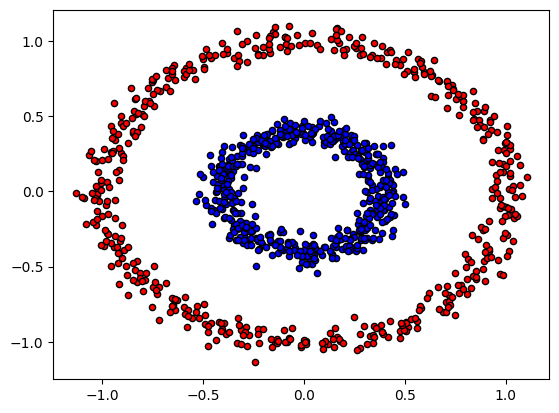

In [8]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [9]:

#Note: shuffle this dataset before dividing it into three parts
np.random.seed(42)  # Set a random seed for reproducibility
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

shuffled_data = data[indices]
shuffled_label = label[indices]

train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15
train_size = int(train_ratio * shuffled_data.shape[0])
valid_size = int(valid_ratio * shuffled_data.shape[0])

# Distribute this data into three parts i.e. training, validation and testing
trainX = shuffled_data[:train_size]# training data point
trainY = shuffled_label[:train_size]# training lables

validX = shuffled_data[train_size:train_size + valid_size] # validation data point
validY = shuffled_label[train_size:train_size + valid_size]# validation lables

testX = shuffled_data[train_size + valid_size:]# testing data point
testY = shuffled_label[train_size + valid_size:]# testing lables




In [10]:
model = Neural_Network(2,1)

sample_X = np.random.randn(700, 2)  
sample_Y = np.random.randn(700, 1)  


sample_y_pred = model.feedforward(sample_X)

model.backwardpropagate(sample_X, sample_Y, sample_y_pred, lr=0.001)


(700, 1)
(1, 1)


In [11]:
model = Neural_Network(2,100)
# try different combinations of epochs and learning rate
print(model.W1.shape)
print(model.W2.shape)
#model.train(trainX, trainY, epochs = 150, learningRate = 0.001, validationX = validX, validationY = validY)

(2, 100)
(100, 1)


In [12]:
#save the best model which you have trained, 
model.saveModel('bestmodel2.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [14]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.loadModel('bestmodel2.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)




0.46